# ĐỀ THI THỬ NHẬP MÔN AI

In [ ]:
#MSSV: 2374802010034
#HỌ VÀ TÊN: Kiều Thiện Bảo

# CÂU 1: TÌM DFS THEO ĐỒ THỊ BÊN DƯỚI BẰNG PYTHON

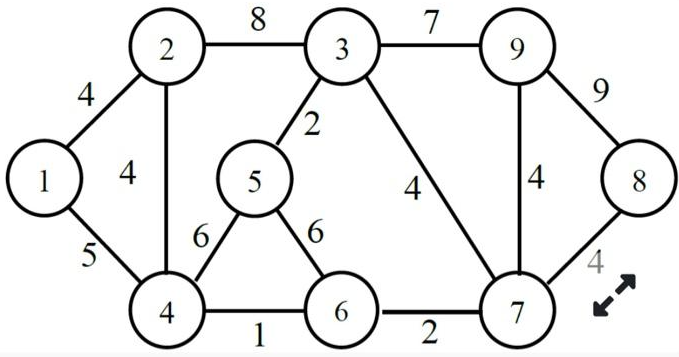

In [3]:
import heapq

def dijkstra(graph, start, goal):
    dist = {node: float('infinity') for node in graph}
    prev = {node: None for node in graph}
    dist[start] = 0
    priority_queue = [(0, start)]  

    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)
        if current_distance > dist[current_node]:
            continue

        if current_node == goal:
            path = []
            while current_node is not None:
                path.insert(0, current_node)
                current_node = prev[current_node]
            return path, dist[goal]

        for neighbor, weight in graph[current_node]:
            distance = current_distance + weight

            if distance < dist[neighbor]:
                dist[neighbor] = distance
                prev[neighbor] = current_node
                heapq.heappush(priority_queue, (distance, neighbor))

    return None, float('infinity')

# Định nghĩa Đồ thị theo hình ảnh (có trọng số)
graph_from_image = {
    1: [(2, 4), (4, 5)],
    2: [(1, 4), (3, 8), (4, 4)],
    3: [(2, 8), (5, 2), (7, 4), (9, 7)],
    4: [(1, 5), (2, 4), (5, 6), (6, 1)],
    5: [(3, 2), (4, 6), (6, 6)],
    6: [(4, 1), (5, 6), (7, 2)],
    7: [(3, 4), (6, 2), (8, 4), (9, 4)],
    8: [(7, 4), (9, 9)],
    9: [(3, 7), (7, 4), (8, 9)]
}

shortest_path, shortest_weight = dijkstra(graph_from_image, 1, 9)

if shortest_path:
    print("Đường đi ngắn nhất từ 1 đến 9 là:", shortest_path, "Tổng trọng số:", shortest_weight)
else:
    print("Không tìm thấy đường đi từ 1 đến 9.")

Đường đi ngắn nhất từ 1 đến 9 là: [1, 4, 6, 7, 9] Tổng trọng số: 12


# CÂU 2: Tối ưu hóa hàm một biến

Tìm $x$ sao cho  
$$
f(x) = -(x^2) + 10x + 50
$$  
đạt giá trị lớn nhất trong khoảng  
$$
x \in [0, 10].
$$

Thế hệ 1: x = 5.0022, f(x) = 74.9932
Thế hệ 2: x = 4.9861, f(x) = 75.0000
Thế hệ 3: x = 4.9861, f(x) = 74.9998
Thế hệ 4: x = 4.9989, f(x) = 74.9998
Thế hệ 5: x = 4.9989, f(x) = 75.0000
Thế hệ 6: x = 5.0001, f(x) = 75.0000
Thế hệ 7: x = 4.9993, f(x) = 75.0000
Thế hệ 8: x = 5.0003, f(x) = 75.0000
Thế hệ 9: x = 5.0000, f(x) = 75.0000
Thế hệ 10: x = 5.0000, f(x) = 75.0000
Thế hệ 11: x = 5.0000, f(x) = 75.0000
Thế hệ 12: x = 5.0000, f(x) = 75.0000
Thế hệ 13: x = 5.0000, f(x) = 75.0000
Thế hệ 14: x = 5.0000, f(x) = 75.0000
Thế hệ 15: x = 5.0000, f(x) = 75.0000
Thế hệ 16: x = 5.0000, f(x) = 75.0000
Thế hệ 17: x = 5.0000, f(x) = 75.0000
Thế hệ 18: x = 5.0000, f(x) = 75.0000
Thế hệ 19: x = 5.0000, f(x) = 75.0000
Thế hệ 20: x = 5.0000, f(x) = 75.0000
Thế hệ 21: x = 5.0000, f(x) = 75.0000
Thế hệ 22: x = 5.0000, f(x) = 75.0000
Thế hệ 23: x = 5.0000, f(x) = 75.0000
Thế hệ 24: x = 5.0000, f(x) = 75.0000
Thế hệ 25: x = 5.0000, f(x) = 75.0000
Thế hệ 26: x = 5.0000, f(x) = 75.0000
Thế hệ 27: x = 5.0000

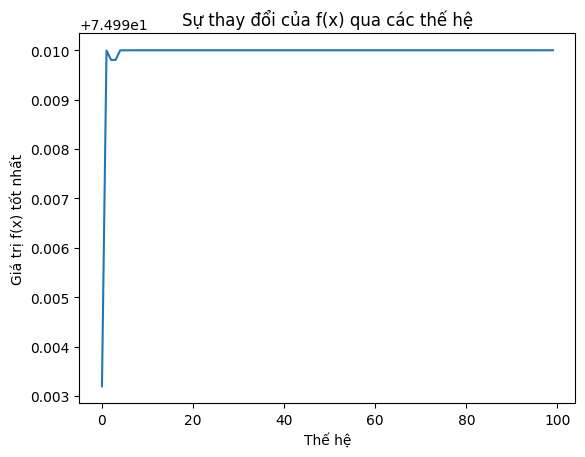


Kết quả cuối cùng: x = 5.0000, f(x) = 75.0000


In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Hàm mục tiêu
def fitness_function(x):
    return -(x**2) + 10*x + 50

# Khởi tạo quần thể
def initialize_population(pop_size, min_val, max_val):
    return [random.uniform(min_val, max_val) for _ in range(pop_size)]

# Lựa chọn (Tournament Selection)
def select_parents(population, fitness_values, tournament_size=3):
    selected = random.sample(range(len(population)), tournament_size)
    best_idx = max(selected, key=lambda i: fitness_values[i])
    return population[best_idx]

# Lai ghép
def crossover(parent1, parent2, crossover_rate=0.8):
    if random.random() < crossover_rate:
        return (parent1 + parent2) / 2
    return parent1

# Đột biến
def mutate(individual, mutation_rate=0.1, min_val=0, max_val=10):
    if random.random() < mutation_rate:
        return random.uniform(min_val, max_val)
    return individual

# Thuật toán di truyền
def genetic_algorithm_example1(pop_size=50, generations=100, min_val=0, max_val=10):
    population = initialize_population(pop_size, min_val, max_val)
    best_fitness_history = []
    
    for generation in range(generations):
        fitness_values = [fitness_function(x) for x in population]
        best_fitness = max(fitness_values)
        best_fitness_history.append(best_fitness)
        
        new_population = []
        for _ in range(pop_size):
            parent1 = select_parents(population, fitness_values)
            parent2 = select_parents(population, fitness_values)
            child = crossover(parent1, parent2)
            child = mutate(child)
            new_population.append(child)
        
        population = new_population
        best_individual = population[np.argmax([fitness_function(x) for x in population])]
        print(f'Thế hệ {generation + 1}: x = {best_individual:.4f}, f(x) = {best_fitness:.4f}')
    
    best_fitness = max([fitness_function(x) for x in population])
    best_individual = population[np.argmax([fitness_function(x) for x in population])]
    
    # Trực quan hóa
    plt.plot(range(generations), best_fitness_history)
    plt.xlabel('Thế hệ')
    plt.ylabel('Giá trị f(x) tốt nhất')
    plt.title('Sự thay đổi của f(x) qua các thế hệ')
    plt.show()
    
    return best_individual, best_fitness

# Chạy thuật toán
best_x, best_f = genetic_algorithm_example1()
print(f'\nKết quả cuối cùng: x = {best_x:.4f}, f(x) = {best_f:.4f}')

# CÂU 3: SỬ DỤNG MÔ HÌNH CNN ĐỂ PHÂN LOẠI DỮ LIỆU CHÓ VÀ MÈO TỪ DATA: 

https://www.kaggle.com/c/dogs-vs-cats/data

Found 20000 images for training
Found 5000 images for testing
Epoch 1, Loss: 0.6924, Accuracy: 63.31%
Epoch 2, Loss: 0.5057, Accuracy: 75.38%
Epoch 3, Loss: 0.4169, Accuracy: 81.00%
Epoch 4, Loss: 0.3237, Accuracy: 86.01%
Epoch 5, Loss: 0.2140, Accuracy: 91.44%
Epoch 6, Loss: 0.1105, Accuracy: 95.86%
Epoch 7, Loss: 0.0675, Accuracy: 97.51%
Epoch 8, Loss: 0.0547, Accuracy: 98.29%
Epoch 9, Loss: 0.0402, Accuracy: 98.70%
Epoch 10, Loss: 0.0543, Accuracy: 98.64%


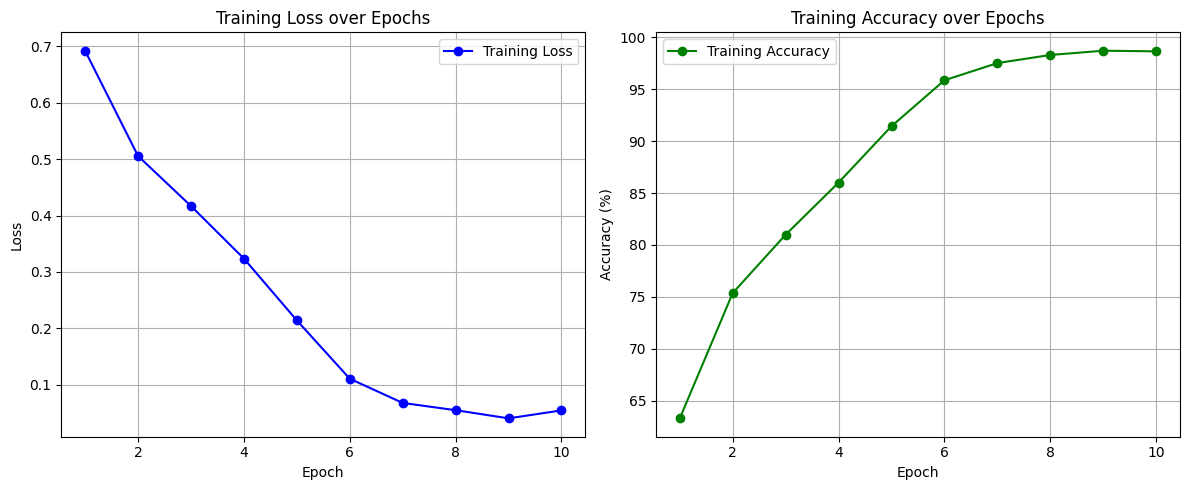

Accuracy on test set: 96.18%


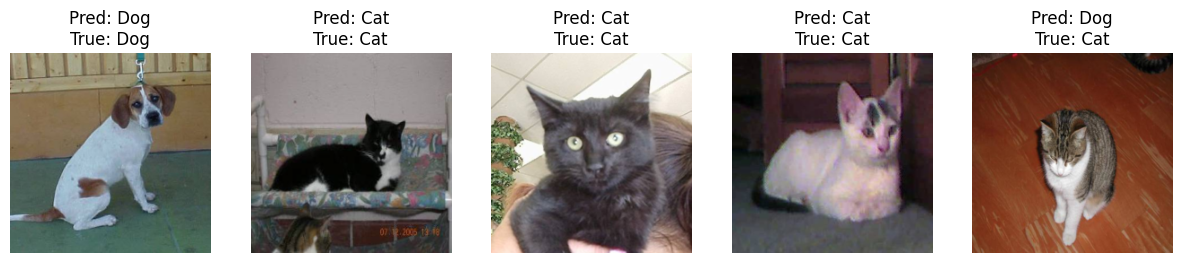

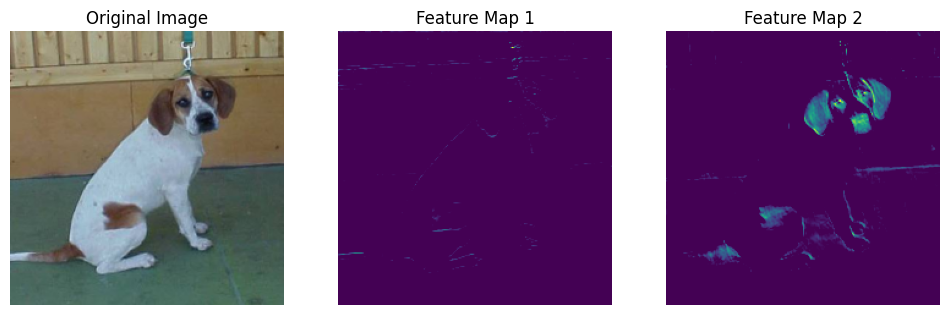

Model saved successfully!


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from PIL import Image

# 1. Define custom dataset for Dogs vs Cats
class DogsVsCatsDataset(Dataset):
    def __init__(self, root_dir, transform=None, train=True):
        self.root_dir = root_dir
        self.transform = transform
        self.train = train
        
        # Dogs vs Cats typically has images named as:
        # cat.0.jpg, cat.1.jpg, ... and dog.0.jpg, dog.1.jpg, ...
        # Find all image files
        self.image_files = []
        self.labels = []
        
        # Look in the train folder for dog and cat images
        train_dir = os.path.join(root_dir, "train")
        if os.path.exists(train_dir):
            for filename in os.listdir(train_dir):
                if filename.endswith('.jpg'):
                    # Extract the class from the filename
                    if filename.startswith('cat'):
                        self.image_files.append(os.path.join(train_dir, filename))
                        self.labels.append(1)  # 1 for cat
                    elif filename.startswith('dog'):
                        self.image_files.append(os.path.join(train_dir, filename))
                        self.labels.append(0)  # 0 for dog
        
        # If no images found, try looking directly in the root directory
        if len(self.image_files) == 0:
            for filename in os.listdir(root_dir):
                if filename.endswith('.jpg'):
                    if filename.startswith('cat'):
                        self.image_files.append(os.path.join(root_dir, filename))
                        self.labels.append(1)  # 1 for cat
                    elif filename.startswith('dog'):
                        self.image_files.append(os.path.join(root_dir, filename))
                        self.labels.append(0)  # 0 for dog
        
        # Split into train and test
        combined = list(zip(self.image_files, self.labels))
        np.random.shuffle(combined)
        self.image_files, self.labels = zip(*combined)
        
        # Convert to lists
        self.image_files = list(self.image_files)
        self.labels = list(self.labels)
        
        split_idx = int(len(self.image_files) * 0.8)
        
        if train:
            self.image_files = self.image_files[:split_idx]
            self.labels = self.labels[:split_idx]
        else:
            self.image_files = self.image_files[split_idx:]
            self.labels = self.labels[split_idx:]
            
        print(f"Found {len(self.image_files)} images for {'training' if train else 'testing'}")

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = self.image_files[idx]
        label = self.labels[idx]
        
        try:
            image = Image.open(img_path).convert('RGB')
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            # Return a placeholder image if can't load
            image = Image.new('RGB', (224, 224), color='gray')

        if self.transform:
            image = self.transform(image)

        return image, label

# 2. Set up data transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize using ImageNet stats
])

# 3. Create datasets and dataloaders
data_dir = "d:/Works/CNN/dogs-vs-cats"  # Main directory

train_dataset = DogsVsCatsDataset(root_dir=data_dir, transform=transform, train=True)
test_dataset = DogsVsCatsDataset(root_dir=data_dir, transform=transform, train=False)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 4. Define CNN model for Dogs vs Cats - FIXED CLASS DEFINITION
class DogsCatsNN(nn.Module):
    def __init__(self):
        super(DogsCatsNN, self).__init__()
        # CNN layers for 224x224 RGB images
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)  # 3 input channels for RGB
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout = nn.Dropout(0.25)
        # After 3 pooling layers (224/2/2/2 = 28), feature map size will be 28x28
        self.fc1 = nn.Linear(128 * 28 * 28, 512)
        self.fc2 = nn.Linear(512, 1)  # Binary classification (1 output for sigmoid)
        self.sigmoid = nn.Sigmoid()  # For binary classification

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))  # 224x224 -> 112x112
        x = self.pool(torch.relu(self.conv2(x)))  # 112x112 -> 56x56
        x = self.pool(torch.relu(self.conv3(x)))  # 56x56 -> 28x28
        x = x.view(-1, 128 * 28 * 28)  # Flatten
        x = self.dropout(x)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.sigmoid(x)  # Apply sigmoid for binary classification
        return x

# 5. Initialize model, loss function, and optimizer
model = DogsCatsNN()
criterion = nn.BCELoss()  # Binary Cross Entropy for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with learning rate 0.001

# 6. Set device (GPU if available, otherwise CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 7. Training loop
loss_values = []
accuracy_values = []

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device).float().view(-1, 1)  # Reshape labels for BCE

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate accuracy
        predicted = (outputs > 0.5).float()  # Threshold at 0.5
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100 * correct / total
    loss_values.append(epoch_loss)
    accuracy_values.append(epoch_accuracy)

    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")

# 8. Plot training curves
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), loss_values, marker='o', color='b', label='Training Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), accuracy_values, marker='o', color='g', label='Training Accuracy')
plt.title('Training Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# 9. Evaluate on test set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device).float().view(-1, 1)
        outputs = model(images)
        predicted = (outputs > 0.5).float()  # Threshold at 0.5
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy on test set: {100 * correct / total:.2f}%")

# 10. Visualize predictions
def visualize_prediction():
    model.eval()
    images, labels = next(iter(test_loader))
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    predicted = (outputs > 0.5).float()

    # Display 5 images with predictions
    fig, axes = plt.subplots(1, 5, figsize=(15, 3))
    for i in range(5):
        # Denormalize image for display
        img = images[i].cpu().numpy().transpose(1, 2, 0)
        img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
        img = np.clip(img, 0, 1)

        axes[i].imshow(img)
        axes[i].set_title(f"Pred: {'Dog' if predicted[i] < 0.5 else 'Cat'}\nTrue: {'Dog' if labels[i] == 0 else 'Cat'}")
        axes[i].axis('off')
    plt.show()

visualize_prediction()

# 11. Visualize feature maps
def visualize_feature_map():
    model.eval()
    images, _ = next(iter(test_loader))
    img = images[0].unsqueeze(0).to(device)

    # Get feature map from first conv layer
    conv1_output = torch.relu(model.conv1(img))

    plt.figure(figsize=(12, 4))

    # Display original image
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    img_display = img[0].cpu().numpy().transpose(1, 2, 0)
    img_display = img_display * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
    img_display = np.clip(img_display, 0, 1)
    plt.imshow(img_display)
    plt.axis('off')

    # Display two feature maps
    plt.subplot(1, 3, 2)
    plt.title("Feature Map 1")
    plt.imshow(conv1_output[0, 0].cpu().detach().numpy(), cmap='viridis')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("Feature Map 2")
    plt.imshow(conv1_output[0, 1].cpu().detach().numpy(), cmap='viridis')
    plt.axis('off')

    plt.show()

visualize_feature_map()

# 12. Save the trained model
torch.save(model.state_dict(), "d:/Works/CNN/dogs_vs_cats_model.pth")
print("Model saved successfully!")

# CÂU 4: SỬ DỤNG NAIVE BAYES CHO TẬP DỮ LIỆU SAU: 

| Day | Outlook  | Temperature | Humidity | Wind  | Play |
|-----|----------|-------------|----------|-------|------|
| 1   | Sunny    | Hot         | High     | False | No   |
| 2   | Sunny    | Hot         | High     | True  | No   |
| 3   | Overcast | Hot         | High     | False | Yes  |
| 4   | Rainy    | Mild        | High     | False | Yes  |
| 5   | Rainy    | Cool        | Normal   | False | Yes  |
| 6   | Rainy    | Cool        | Normal   | True  | No   |
| 7   | Overcast | Cool        | Normal   | True  | Yes  |
| 8   | Sunny    | Mild        | High     | False | No   |
| 9   | Sunny    | Cool        | Normal   | False | Yes  |
| 10  | Rainy    | Mild        | Normal   | False | Yes  |
| 11  | Sunny    | Mild        | Normal   | True  | Yes  |
| 12  | Overcast | Mild        | High     | True  | Yes  |
| 13  | Overcast | Hot         | Normal   | False | Yes  |
| 14  | Rainy    | Mild        | High     | True  | No   |

YÊU CẦU : Xây dựng mô hình Naive Bayes để dự đoán nhãn Play (Yes/No) dựa trên các đặc trưng: Outlook, Temperature, Humidity, và Wind

In [1]:
import pandas as pd
import numpy as np

# Create the dataset
data = {
    'Day': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the dataset
print("Dataset:")
print(df)

# Calculate prior probabilities P(Class)
prior_probs = df['Play'].value_counts(normalize=True)
print("\nPrior Probabilities P(Class):")
print(prior_probs)

# Calculate conditional probabilities P(Feature | Class)
features = ['Outlook', 'Temperature', 'Humidity', 'Wind']
cond_probs = {}

for feature in features:
    print(f"\nConditional Probability P({feature} | Play):")
    prob_table = pd.crosstab(df[feature], df['Play'], normalize='columns')
    print(prob_table)
    cond_probs[feature] = prob_table

# Naive Bayes prediction function
def predict_naive_bayes(instance, prior_probs, cond_probs, features):
    probabilities = {}
    
    for class_val in prior_probs.index:
        # Start with prior probability P(Class)
        probabilities[class_val] = prior_probs[class_val]
        
        # Multiply by each conditional probability P(Feature | Class)
        for feature in features:
            feature_value = instance[feature]
            
            if feature_value in cond_probs[feature].index:
                probabilities[class_val] *= cond_probs[feature].loc[feature_value, class_val]
            else:
                # Handle unseen values
                probabilities[class_val] *= 0.01
    
    # Normalize probabilities
    total = sum(probabilities.values())
    normalized_probs = {class_val: prob/total for class_val, prob in probabilities.items()}
    
    # Return prediction and probabilities
    prediction = max(normalized_probs, key=normalized_probs.get)
    return prediction, normalized_probs

# Test the classifier on the training data
print("\nPredictions on Training Data:")
correct = 0
for i, row in df.iterrows():
    instance = {feature: row[feature] for feature in features}
    prediction, probs = predict_naive_bayes(instance, prior_probs, cond_probs, features)
    actual = row['Play']
    correct += (prediction == actual)
    print(f"Day {row['Day']}: Actual={actual}, Predicted={prediction}")

print(f"\nAccuracy on training data: {correct/len(df):.4f}")

# Example: Predict for a new instance
new_instance = {
    'Outlook': 'Sunny',
    'Temperature': 'Cool',
    'Humidity': 'High',
    'Wind': True
}

prediction, probabilities = predict_naive_bayes(new_instance, prior_probs, cond_probs, features)
print(f"\nPrediction for new instance {new_instance}: {prediction}")
print(f"Probabilities: {probabilities}")

# Example 2: Test with another instance
new_instance2 = {
    'Outlook': 'Overcast',
    'Temperature': 'Mild',
    'Humidity': 'Normal',
    'Wind': False
}

prediction2, probabilities2 = predict_naive_bayes(new_instance2, prior_probs, cond_probs, features)
print(f"\nPrediction for new instance {new_instance2}: {prediction2}")
print(f"Probabilities: {probabilities2}")

Dataset:
    Day   Outlook Temperature Humidity   Wind Play
0     1     Sunny         Hot     High  False   No
1     2     Sunny         Hot     High   True   No
2     3  Overcast         Hot     High  False  Yes
3     4     Rainy        Mild     High  False  Yes
4     5     Rainy        Cool   Normal  False  Yes
5     6     Rainy        Cool   Normal   True   No
6     7  Overcast        Cool   Normal   True  Yes
7     8     Sunny        Mild     High  False   No
8     9     Sunny        Cool   Normal  False  Yes
9    10     Rainy        Mild   Normal  False  Yes
10   11     Sunny        Mild   Normal   True  Yes
11   12  Overcast        Mild     High   True  Yes
12   13  Overcast         Hot   Normal  False  Yes
13   14     Rainy        Mild     High   True   No

Prior Probabilities P(Class):
Play
Yes    0.642857
No     0.357143
Name: proportion, dtype: float64

Conditional Probability P(Outlook | Play):
Play       No       Yes
Outlook                
Overcast  0.0  0.444444
Rainy    